In [1]:
%pylab nbagg
from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


# Simulate and Visualize

Finally, we can use the objects created above in a simulation:

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


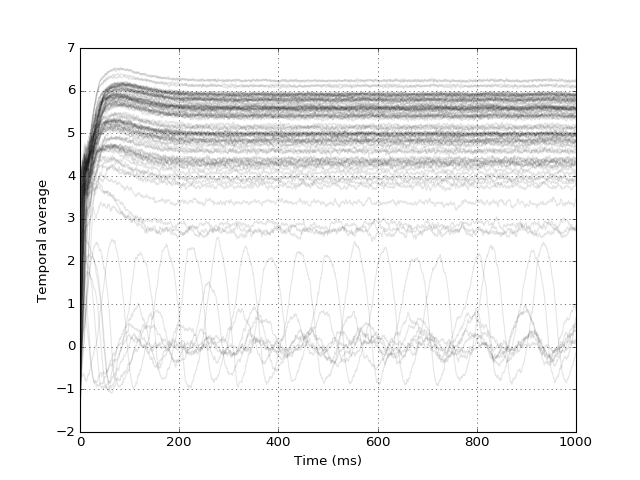

In [20]:
sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=0.0),
    # Change the Conn matrix here; make it twice as large three times as large
    connectivity=connectivity.Connectivity.from_file('connectivity_96.zip'),  # use the connectivity structure defined below
    #coupling=coupling.PreSigmoidal(H=gain,theta=0.0,dynamic=False), # parameters?
    coupling=coupling.Linear(a=0.2),
    integrator=integrators.HeunStochastic(dt=0.5,
                        noise=noise.Additive(nsig=5e-4)),
    monitors = monitors.Raw(),
    simulation_length=1e3,
).configure()


# run
(tavg_time, tavg_data), = sim.run()

# plot
figure()
plot(tavg_time, tavg_data[:, 0, :, 0], 'k', alpha=0.1)
grid(True)
xlabel('Time (ms)')
ylabel("Temporal average")

In [21]:
Data_sq=tavg_data[:,0,:,0]
import scipy.io as sio
sio.savemat('/Users/RChenLab/Documents/TVB_Distribution/demo_scripts/Github/ThalCorProject/data/test2.mat',{'data_struct':Data_sq})

In [22]:
Data_sq[1,1]

3.8748230713181404

As long as the interactive phase plane figure isn't closed, the parameters can be tuned and the simulation rerun to iterate between the local dynamics of a node and integration scheme and the global dynamics of the entire network.